In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv("covtype.data", header=None)
column_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"]
wilderness_areas = ["Wilderness_Area" + str(i) for i in range(1, 5)]
column_names.extend(wilderness_areas)
soil_types = ["Soil_Type" + str(i) for i in range(1, 41)]
column_names.extend(soil_types)
column_names.append("Cover_Type")
data.columns = column_names
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [105]:
data.shape

(581012, 55)

In [106]:
data['Soil_Type'] = data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].sum(axis=1)

data['Wilderness_Area'] = data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)
data = data.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

data = data.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


# Ejercicio 1

In [107]:
from sklearn.ensemble import ExtraTreesClassifier

X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

clf = ExtraTreesClassifier(random_state = 100)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.33667002, 0.05518203, 0.04448043, 0.07945314, 0.07532787,
       0.137743  , 0.0462498 , 0.04918995, 0.04513897, 0.13056479,
       0.        , 0.        ])

In [108]:
df_importance = clf.feature_importances_

In [109]:
# Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
df_importance = pd.DataFrame(df_importance, columns=['importance'])
df_importance = df_importance.sort_values(by=['importance'], ascending=False)
df_importance['cumsum'] = df_importance['importance'].cumsum()
df_importance = df_importance[df_importance['cumsum'] <= 0.95]
df_importance

,importance,cumsum
0,0.336670,0.336670
5,0.137743,0.474413
9,0.130565,0.604978
3,0.079453,0.684431
4,0.075328,0.759759
1,0.055182,0.814941
7,0.049190,0.864131
6,0.046250,0.910381


In [110]:
# Ahora con los datos del 95% se eliminan las variables que no aportan información útil.
importancia_filtrada = X.iloc[:, df_importance.index]
importancia_filtrada

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am
0,2596,510,6279,258,0,51,232,221
1,2590,390,6225,212,-6,56,235,220
2,2804,3180,6121,268,65,139,238,234
3,2785,3090,6211,242,118,155,238,238
4,2595,391,6172,153,-1,45,234,220
...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,153,237,240
581008,2391,95,845,67,12,152,237,240
581009,2386,90,854,60,7,159,241,236
581010,2384,90,864,60,5,170,245,230


# Ejercicio 2

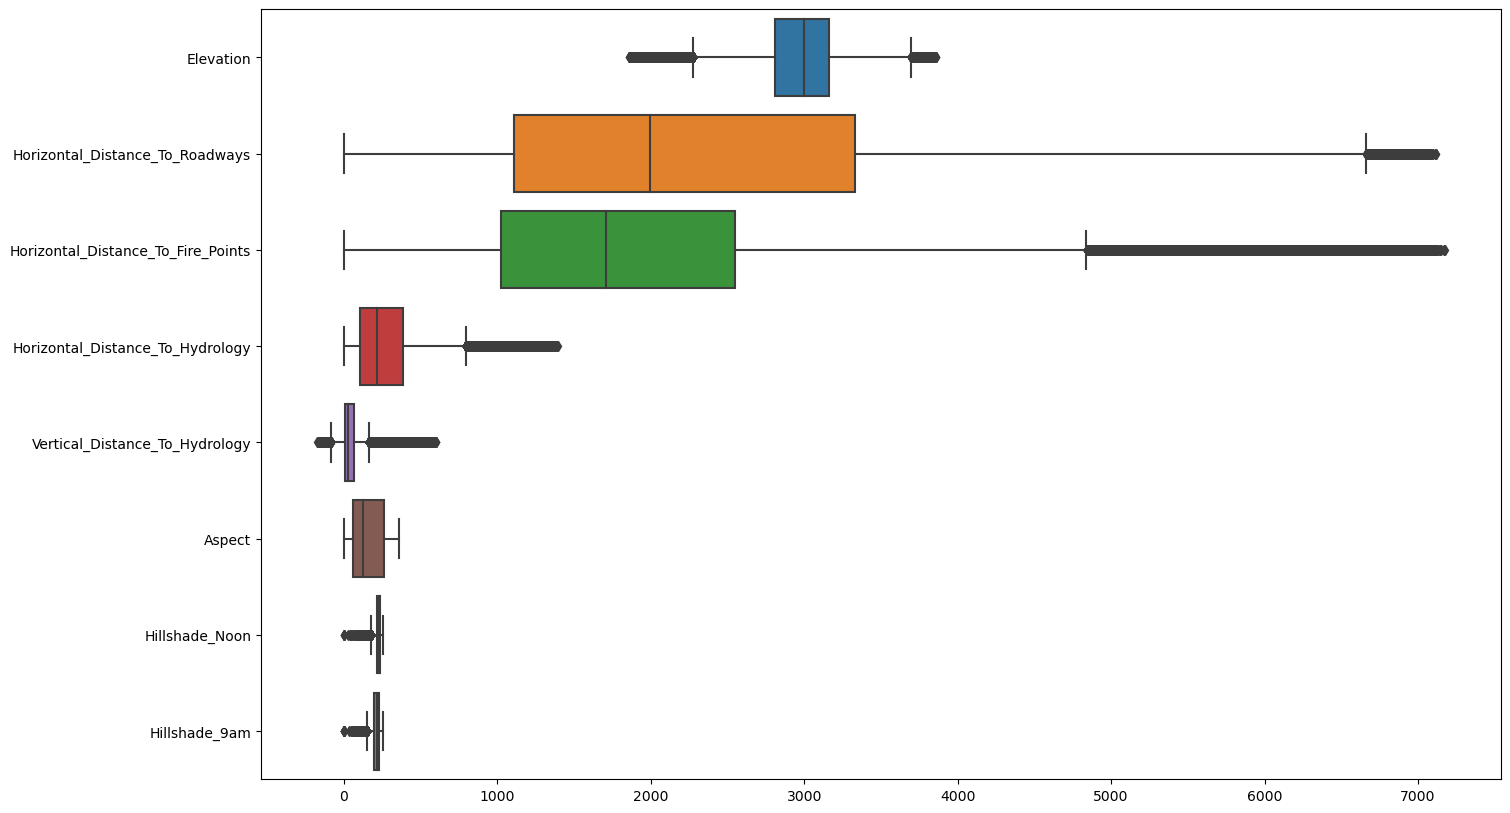

In [111]:
plt.figure(figsize=(16,10))
sns.boxplot(data=importancia_filtrada, orient="h")
plt.show()

Normalizar las variables:

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(importancia_filtrada)
importancia_filtrada = scaler.transform(importancia_filtrada)
importancia_filtrada = pd.DataFrame(importancia_filtrada, columns=X.columns[df_importance.index])
importancia_filtrada

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.141667,0.913386,0.870079
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.155556,0.925197,0.866142
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.386111,0.937008,0.921260
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.430556,0.937008,0.937008
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.125000,0.921260,0.866142
...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.425000,0.933071,0.944882
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.422222,0.933071,0.944882
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.441667,0.948819,0.929134
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.472222,0.964567,0.905512


In [133]:
# Agregar a la tabla la variable Cover_Type
importancia_filtrada['Cover_Type'] = y
importancia_filtrada
data_scaled = importancia_filtrada.copy()
data_scaled

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.141667,0.913386,0.870079,5
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.155556,0.925197,0.866142,5
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.386111,0.937008,0.921260,2
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.430556,0.937008,0.937008,2
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.125000,0.921260,0.866142,5
...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.425000,0.933071,0.944882,3
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.422222,0.933071,0.944882,3
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.441667,0.948819,0.929134,3
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.472222,0.964567,0.905512,3


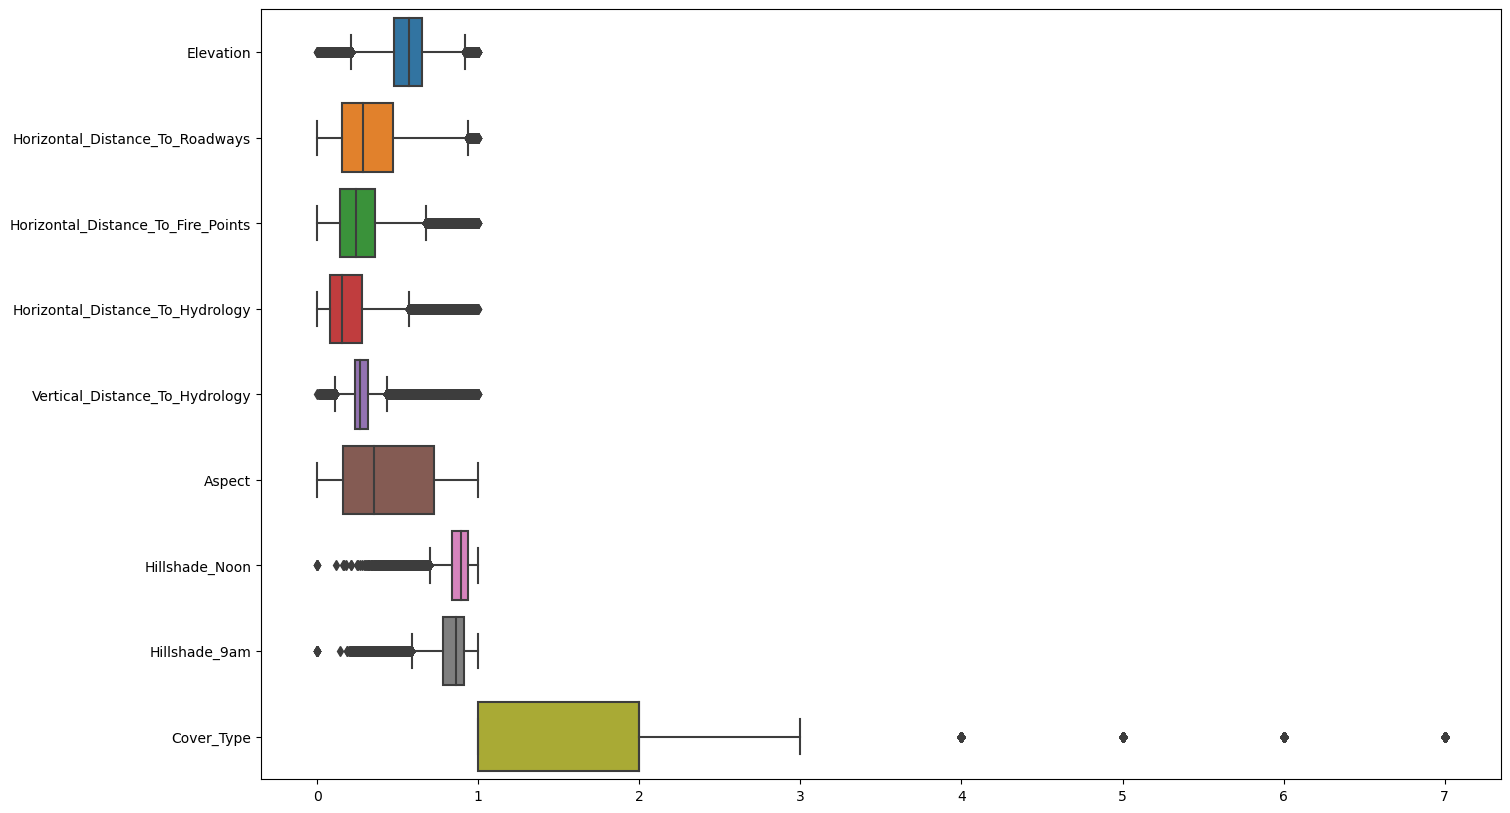

In [127]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data_scaled, orient="h")
plt.show()

# Ejericio 3

3.1

In [128]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['Cover_Type'])
y = data_scaled['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [129]:
X_test.to_csv("X_test.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

3.2

In [131]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(max_iter= 1000, random_state=100)

3.3

In [132]:
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [119]:
y_pred = log_r.predict(X_test)

In [120]:
print(y_pred)

[2 2 1 ... 3 2 2]


In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6853953856612996

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.67      0.70      0.68     42446
           2       0.71      0.80      0.75     56592
           3       0.63      0.65      0.64      7133
           4       0.52      0.23      0.32       571
           5       0.00      0.00      0.00      1847
           6       0.31      0.02      0.03      3456
           7       0.45      0.03      0.05      4158

    accuracy                           0.69    116203
   macro avg       0.47      0.34      0.35    116203
weighted avg       0.65      0.69      0.66    116203



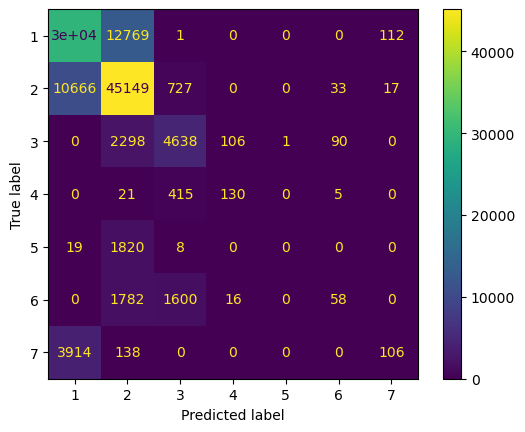

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cua = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
cua.plot()

plt.show()

In [124]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6575461299603805

# Ejercicio 4

In [136]:
# ahora en vez de hacerlo con una regresión logística lo hacemos con un Decision Tree Classifire
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=100)

In [138]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [140]:
accuracy_score(y_test, y_pred)

0.9119902240045438

In [141]:
f1_score(y_test, y_pred, average='weighted')

0.9119910788766402

In [142]:
#Classification report (zero_division=0)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91     42446
           2       0.93      0.93      0.93     56592
           3       0.89      0.89      0.89      7133
           4       0.78      0.79      0.79       571
           5       0.76      0.77      0.77      1847
           6       0.82      0.81      0.81      3456
           7       0.91      0.91      0.91      4158

    accuracy                           0.91    116203
   macro avg       0.86      0.86      0.86    116203
weighted avg       0.91      0.91      0.91    116203

